In [38]:
# Import Packages
from ml import *

In [39]:
# Load data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

In [40]:
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
0,2015-01-02,klant_1,8421,0
1,2015-01-02,klant_2,4547,0
2,2015-01-02,klant_3,13,0
3,2015-01-02,klant_4,0,0
4,2015-01-02,klant_5,0,0
...,...,...,...,...
9835,2019-06-29,klant_2,0,24917
9836,2019-06-29,klant_3,0,20
9837,2019-06-29,klant_4,0,1
9838,2019-06-29,klant_5,0,116


In [41]:
cust_filter = data['cust_id'] == 'klant_1'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

In [42]:
data.procesdag = pd.to_datetime(data.procesdag)

In [43]:
sec = ((data.procesdag).astype(int) / 1e9).astype(int)

In [44]:
min((sec - sec.shift(1)).dropna())
max((sec - sec.shift(1)).dropna())

259200.0

In [45]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

In [46]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

No handles with labels found to put in legend.


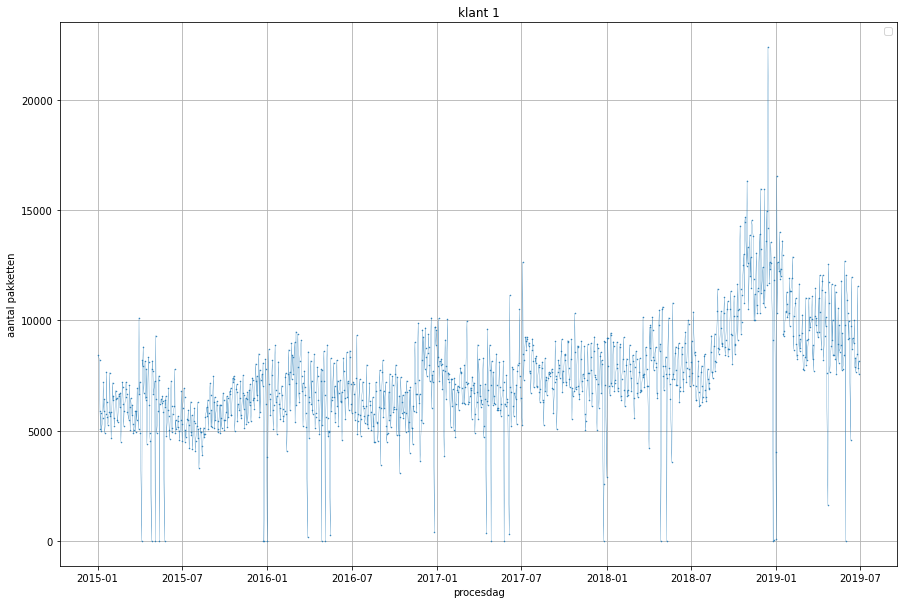

In [47]:
train_X0 = train_X.where(data['cust_id'] == 'klant_1').dropna()

fig, ax = plt.subplots(figsize=(15, 10))
#plt.scatter(train_X0['procesdag'], train_X0.aantal_pakketten, label='klant_1', s=1)
plt.plot(train_X0['procesdag'], train_X0.aantal_pakketten, ".-", ms=1, lw=0.25)
plt.ylabel('aantal pakketten')
plt.xlabel('procesdag')
plt.title('klant 1')
plt.grid()
plt.legend();


In [48]:
train_X0

,procesdag,aantal_pakketten
0,2015-01-02,8421.0
18,2015-01-05,8213.0
24,2015-01-06,5899.0
30,2015-01-07,5083.0
36,2015-01-08,5814.0
...,...,...
9804,2019-06-24,8477.0
9810,2019-06-25,11545.0
9816,2019-06-26,7854.0
9822,2019-06-27,8161.0
